In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import math

import splitfolders

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

from keras.models import Sequential # type: ignore
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate # type: ignore
from keras.callbacks import EarlyStopping,ReduceLROnPlateau # type: ignore
from keras.utils import plot_model # type: ignore

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dataset_directory = './CropDisease'
directory_list = [dir for dir in os.listdir(dataset_directory) if not dir.startswith('.')]
directory_list

['Apple Black Rot',
 'Apple Cedar Rust',
 'Apple Healthy',
 'Apple Scab',
 'Bell Pepper Bacterial Spot',
 'Bell Pepper Healthy',
 'Cherry Healthy',
 'Cherry Powdery Mildew',
 'Corn Common Rust',
 'Corn Grey Leaf Spot',
 'Corn Healthy',
 'Corn Northern Leaf Blight',
 'Grape Black Rot',
 'Grape Esca Black Measles',
 'Grape Healthy',
 'Grape Leaf Blight',
 'Peach Bacterial Spot',
 'Peach Healthy',
 'Potato Early Blight',
 'Potato Healthy',
 'Potato Late Blight',
 'Strawberry Healthy',
 'Strawberry Leaf Scorch',
 'Tomato Bacterial Spot',
 'Tomato Curl Virus',
 'Tomato Early Blight',
 'Tomato Healthy',
 'Tomato Late Blight',
 'Tomato Leaf Mold',
 'Tomato Mosaic Virus',
 'Tomato Septoria Leaf Spot',
 'Tomato Spider Mites',
 'Tomato Target Spot']

In [3]:
for i in directory_list:
  print(len(os.listdir(f'./CropDisease/{i}')))

621
275
1645
630
997
1478
853
1052
1192
513
1162
985
1180
1383
423
1076
2297
360
1000
152
1000
456
1109
2127
2255
1000
1591
1909
952
373
1771
1676
1404


In [4]:
total_images = 0
for i in directory_list:
  total_images += len(os.listdir(f'./CropDisease/{i}'))
print(f"Total number of images in the dataset: {total_images}")

Total number of images in the dataset: 36897


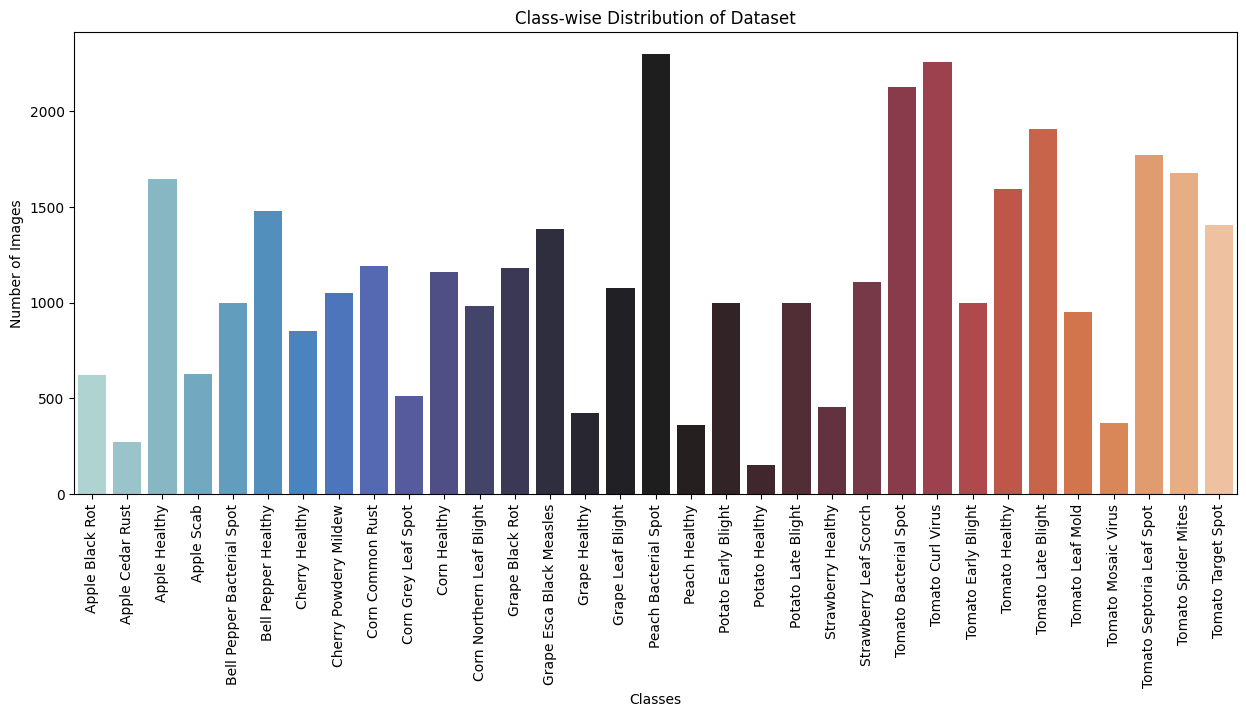

In [ ]:

class_distribution = {}
for i in directory_list:
  class_distribution[i] = len(os.listdir(f'./CropDisease/{i}'))


class_names = list(class_distribution.keys())
class_counts = list(class_distribution.values())


plt.figure(figsize=(15, 6))
sns.barplot(x=class_names, y=class_counts, palette="icefire", hue=class_names, legend=False)
plt.xticks(rotation=90)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class-wise Distribution of Dataset")
plt.show()

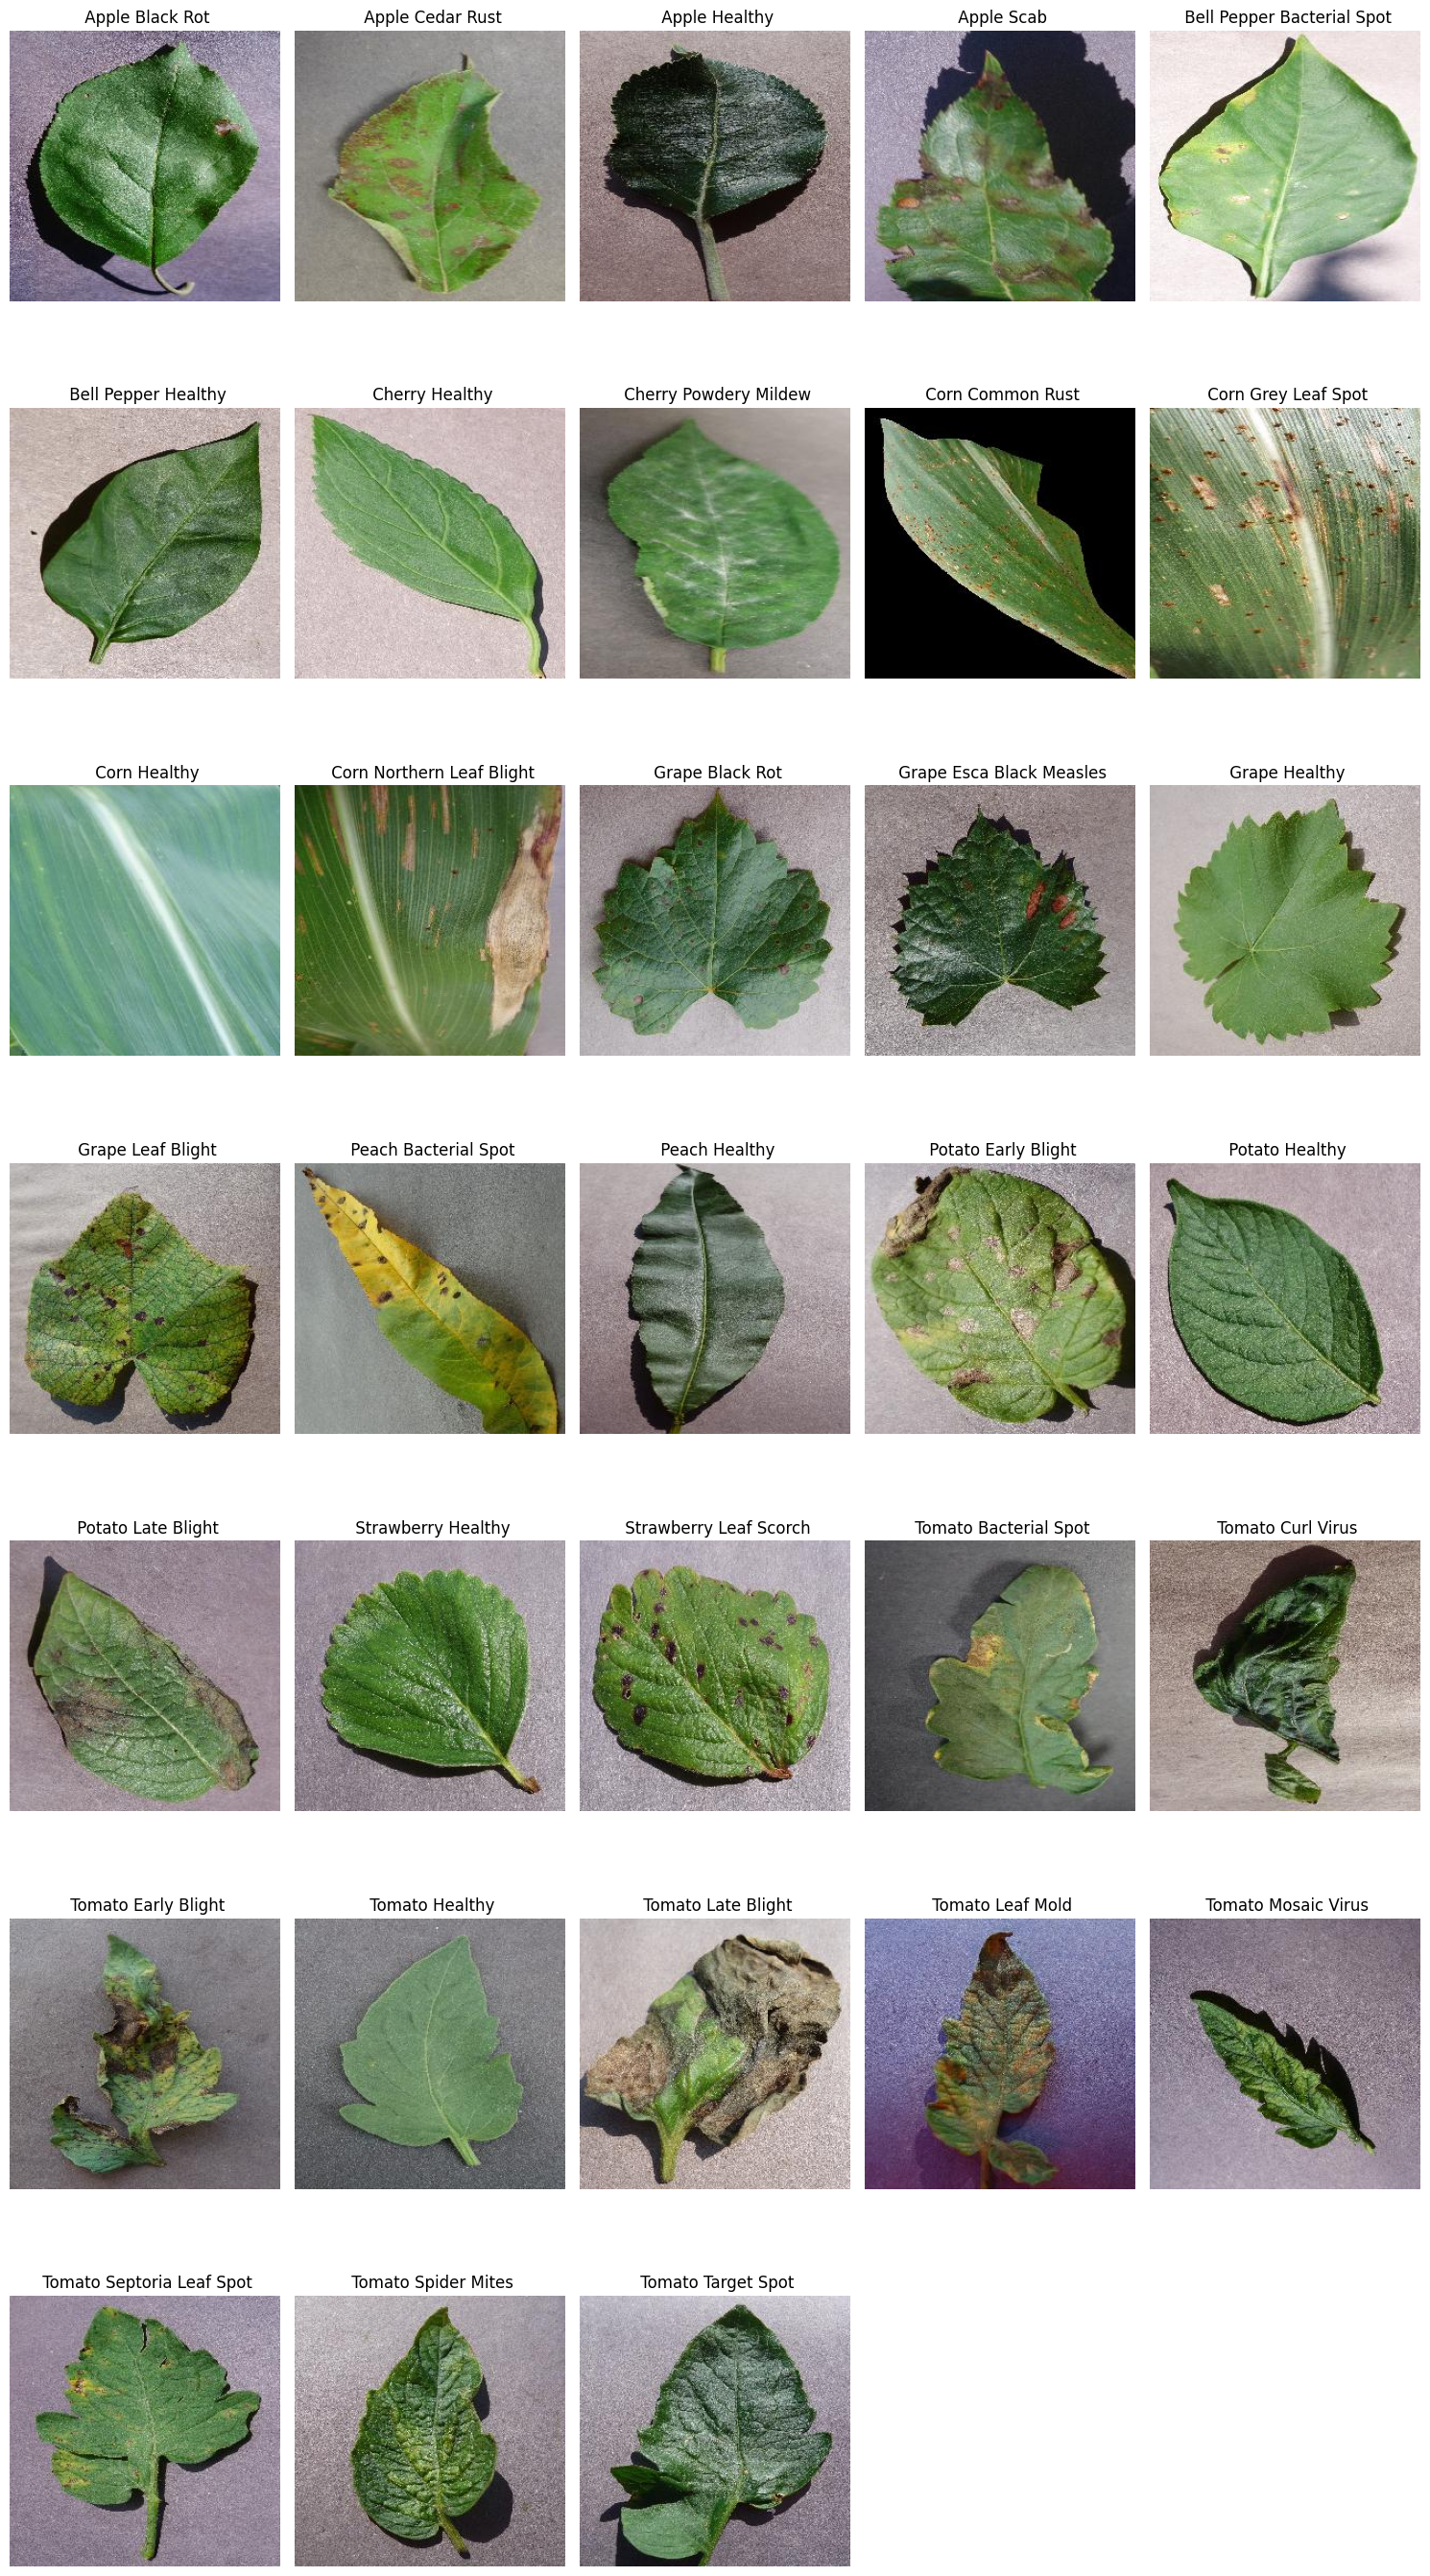

In [ ]:
base_path = './CropDisease/'


directory_list = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]


random_images = []

for directory in directory_list:
    # Get all jpg files in the current directory
    jpg_files = [f for f in os.listdir(os.path.join(base_path, directory)) if f.lower().endswith('.jpg')]

    if jpg_files:
        # Select a random image from the list of jpg files
        random_image = random.choice(jpg_files)
        random_images.append((directory, random_image))

# Number of columns
columns = 5  # Change this to adjust the number of columns

# Calculate the number of rows needed based on the total number of images and columns
rows = math.ceil(len(random_images) / columns)

# Display the random images with their labels in a grid structure
plt.figure(figsize=(15, rows * 4))  # Adjust figure size based on number of rows

for i, (label, image_file) in enumerate(random_images, start=1):
    # Read the image
    img_path = os.path.join(base_path, label, image_file)
    img = mpimg.imread(img_path)

    # Calculate the subplot position
    plt.subplot(rows, columns, i)

    # Display the image with the label as the title
    plt.imshow(img)
    plt.title(f' {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
splitfolders.ratio('./CropDisease/',output='./Dataset Split/', seed=40, ratio=(0.7,0.2,0.1))

train_path = './Dataset Split/train'
val_path = './Dataset Split/val'
test_path = './Dataset Split/test'

In [8]:
# Directory paths
batch_size = 64
image_size = (256, 256)

datagen = ImageDataGenerator(rescale=1./255, rotation_range=140, brightness_range=[0.4,1.0], horizontal_flip=True, vertical_flip=True)

train_data = datagen.flow_from_directory(train_path, target_size=image_size, batch_size=batch_size, class_mode='sparse')
val_data = datagen.flow_from_directory(val_path, target_size=image_size, batch_size=batch_size, class_mode='sparse')
test_data = datagen.flow_from_directory(test_path, target_size=image_size, batch_size=batch_size, class_mode='sparse')

Found 26858 images belonging to 33 classes.
Found 8039 images belonging to 33 classes.
Found 4107 images belonging to 33 classes.


In [9]:
model = Sequential()

#input layer
model.add(Input(shape=(256, 256, 3))) 
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(MaxPooling2D(strides=2, padding='same'))

model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(MaxPooling2D(strides=2, padding='same'))

model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(MaxPooling2D(strides=2, padding='same'))

# fully connected layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))

# output layer
model.add(Dense(33, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 33)             │         4,257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,874,849 (64.37 MB)

 Trainable params: 16,874,849 (64.37 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
cnn = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10


c:\Users\SAM\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


420/420 ━━━━━━━━━━━━━━━━━━━━ 955s 2s/step - accuracy: 0.3568 - loss: 2.3407 - val_accuracy: 0.7047 - val_loss: 1.0053
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 808s 2s/step - accuracy: 0.6920 - loss: 1.0062 - val_accuracy: 0.7386 - val_loss: 0.8161
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 632s 1s/step - accuracy: 0.7777 - loss: 0.7233 - val_accuracy: 0.8048 - val_loss: 0.6179
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 865s 2s/step - accuracy: 0.8179 - loss: 0.5786 - val_accuracy: 0.8439 - val_loss: 0.4989
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 652s 2s/step - accuracy: 0.8513 - loss: 0.4621 - val_accuracy: 0.8826 - val_loss: 0.3782
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 615s 1s/step - accuracy: 0.8779 - loss: 0.3827 - val_accuracy: 0.8803 - val_loss: 0.3973
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 613s 1s/step - accuracy: 0.8904 - loss: 0.3341 - val_accuracy: 0.9006 - val_loss: 0.3241
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 614s 1s/step - accuracy: 0.8981 - loss: 0.3105 - val_accuracy: 0.915

In [11]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_data, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 92.55343079566956
The Loss of the model for training data is: 0.22458568215370178
The accuracy of the model for validation data is: 91.44172072410583
The Loss of the model for validation data is: 0.2788223624229431


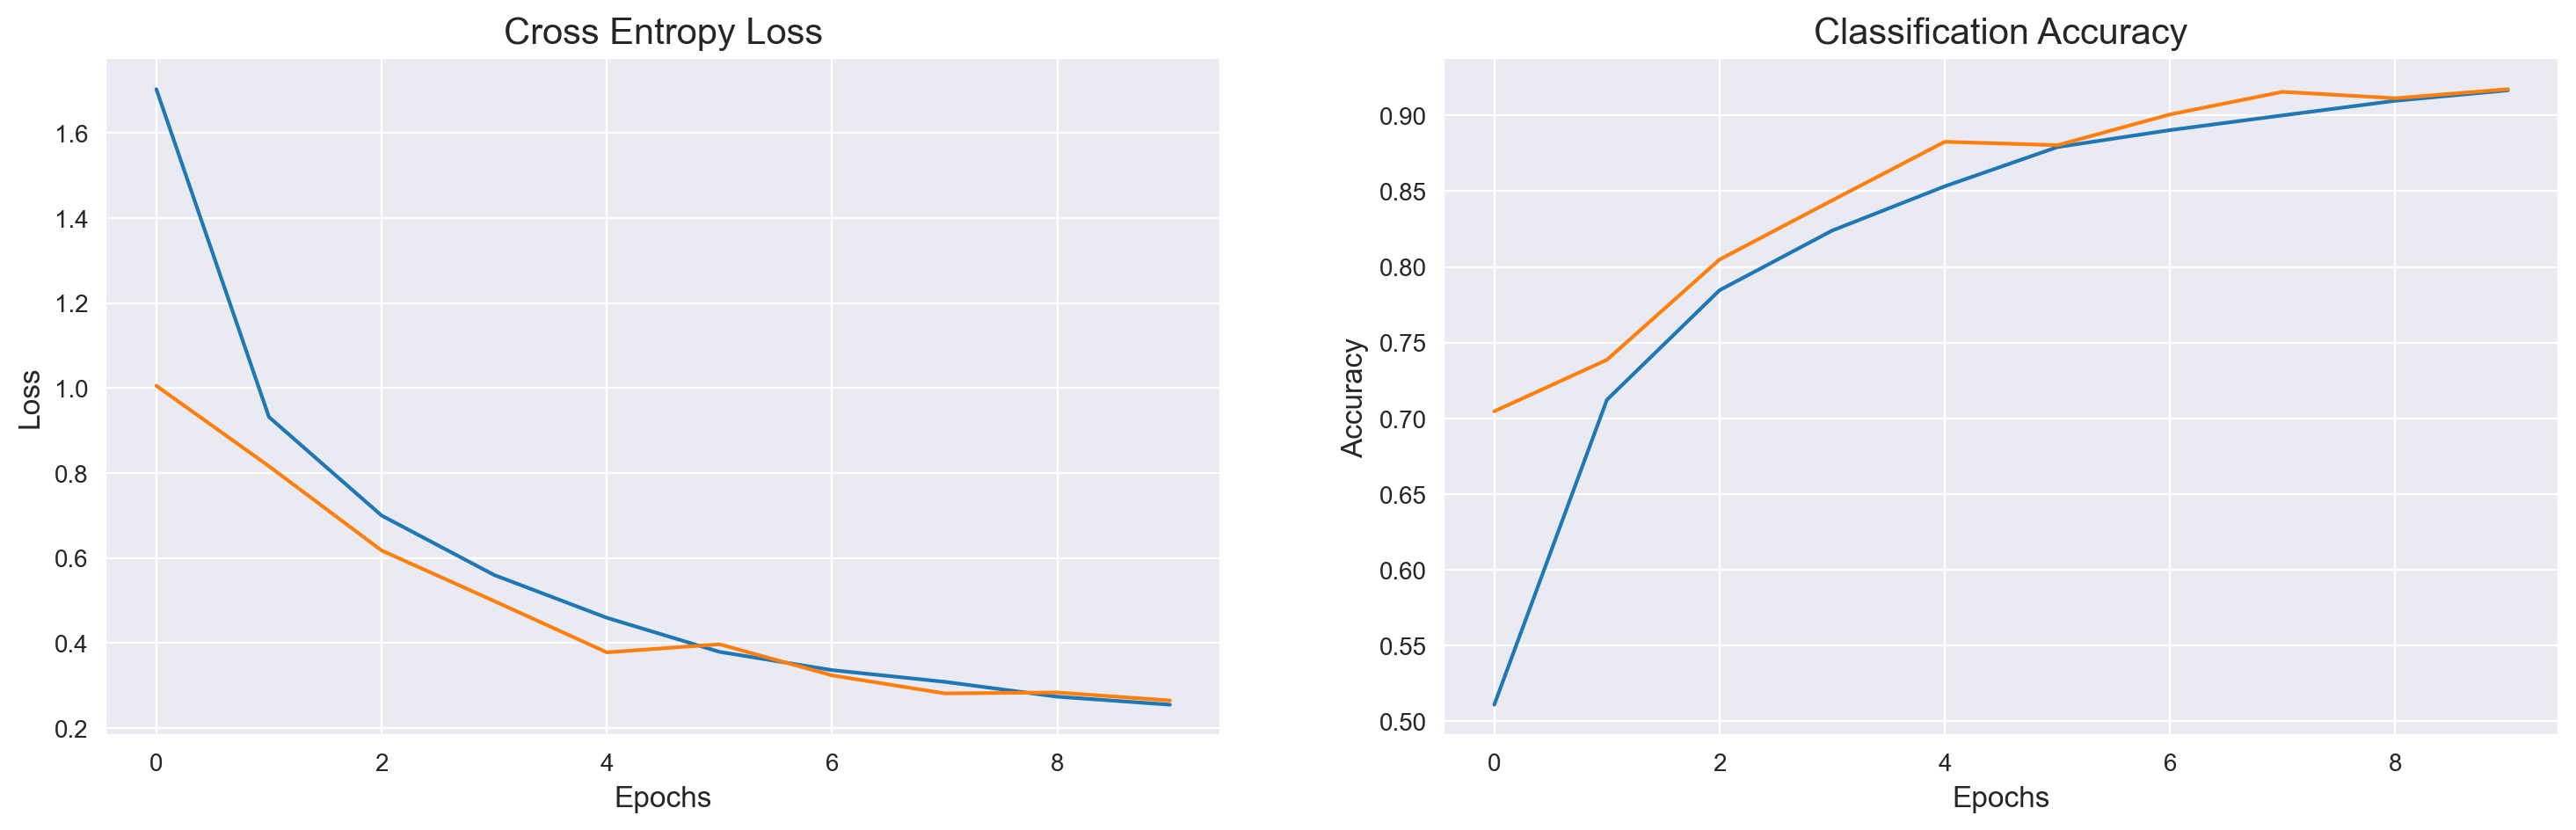

In [12]:
eval = pd.DataFrame(cnn.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(eval['loss'])
plt.plot(eval['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(eval['accuracy'])
plt.plot(eval['val_accuracy'])

plt.show()

In [13]:
result = model.predict(test_data,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

# Evaluvate
loss,acc = model.evaluate(test_data,verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 91.62405729293823
The Loss of the model for testing data is: 0.2659626305103302


In [14]:
p = y_pred
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 139
Incorrect predicted classes: 3968


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


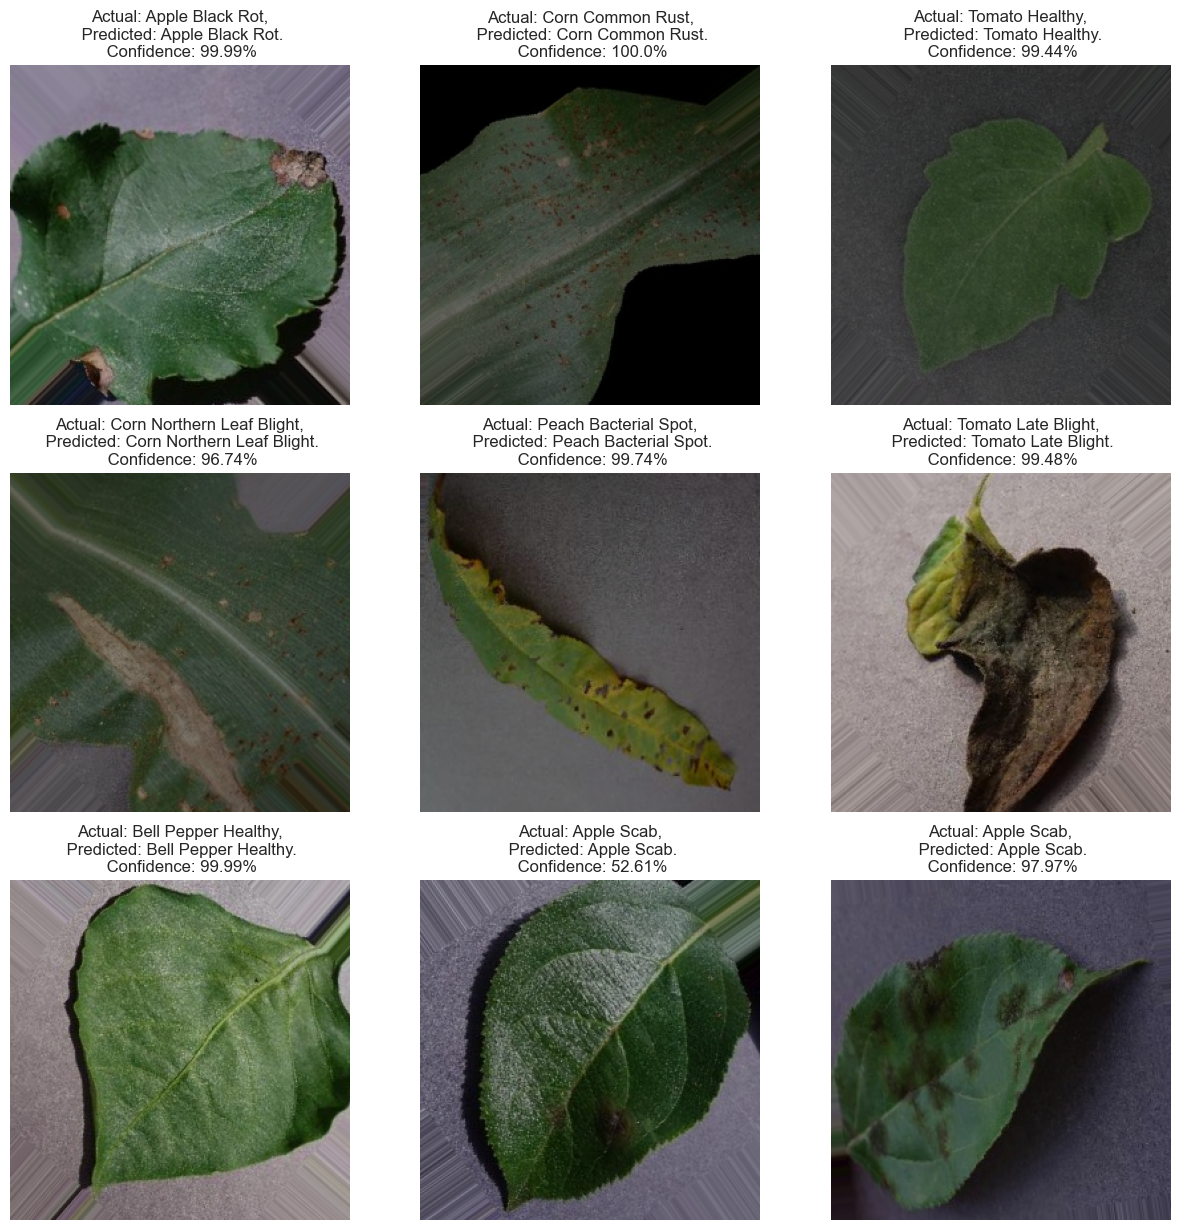

In [27]:
class_names = list(train_data.class_indices.keys())
class_names

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_data:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [24]:
report = classification_report(y_true, y_pred,target_names= class_names, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score      support
Apple Black Rot              0.024793  0.024390  0.024590   123.000000
Apple Cedar Rust             0.056604  0.054545  0.055556    55.000000
Apple Healthy                0.060976  0.063091  0.062016   317.000000
Apple Scab                   0.032787  0.032520  0.032653   123.000000
Bell Pepper Bacterial Spot   0.068571  0.061224  0.064690   196.000000
Bell Pepper Healthy          0.034722  0.033557  0.034130   149.000000
Cherry Healthy               0.000000  0.000000  0.000000    86.000000
Cherry Powdery Mildew        0.029412  0.028302  0.028846   106.000000
Corn Common Rust             0.025210  0.025000  0.025105   120.000000
Corn Grey Leaf Spot          0.000000  0.000000  0.000000    52.000000
Corn Healthy                 0.052174  0.051282  0.051724   117.000000
Corn Northern Leaf Blight    0.000000  0.000000  0.000000    99.000000
Grape Black Rot              0.008621  0.008475  0.008547   118.000000
Grape Esca Black Measles     0.022727  0.021583  0.022140   139.000000
Grape Healthy                0.000000  0.000000  0.000000    43.000000
Grape Leaf Blight            0.017391  0.018519  0.017937   108.000000
Peach Bacterial Spot         0.045455  0.056277  0.050290   231.000000
Peach Healthy                0.048780  0.054054  0.051282    37.000000
Potato Early Blight          0.021277  0.020000  0.020619   100.000000
Potato Healthy               0.000000  0.000000  0.000000    16.000000
Potato Late Blight           0.051724  0.060000  0.055556   100.000000
Strawberry Healthy           0.000000  0.000000  0.000000    46.000000
Strawberry Leaf Scorch       0.018692  0.017857  0.018265   112.000000
Tomato Bacterial Spot        0.051020  0.046729  0.048780   214.000000
Tomato Curl Virus            0.028169  0.026549  0.027335   226.000000
Tomato Early Blight          0.043860  0.050000  0.046729   100.000000
Tomato Healthy               0.042945  0.043750  0.043344   160.000000
Tomato Late Blight           0.042683  0.036458  0.039326   192.000000
Tomato Leaf Mold             0.013158  0.010417  0.011628    96.000000
Tomato Mosaic Virus          0.024390  0.026316  0.025316    38.000000
Tomato Septoria Leaf Spot    0.031579  0.033708  0.032609   178.000000
Tomato Spider Mites          0.011173  0.011905  0.011527   168.000000
Tomato Target Spot           0.028169  0.028169  0.028169   142.000000
accuracy                     0.033845  0.033845  0.033845     0.033845
macro avg                    0.028396  0.028627  0.028446  4107.000000
weighted avg                 0.033738  0.033845  0.033708  4107.000000

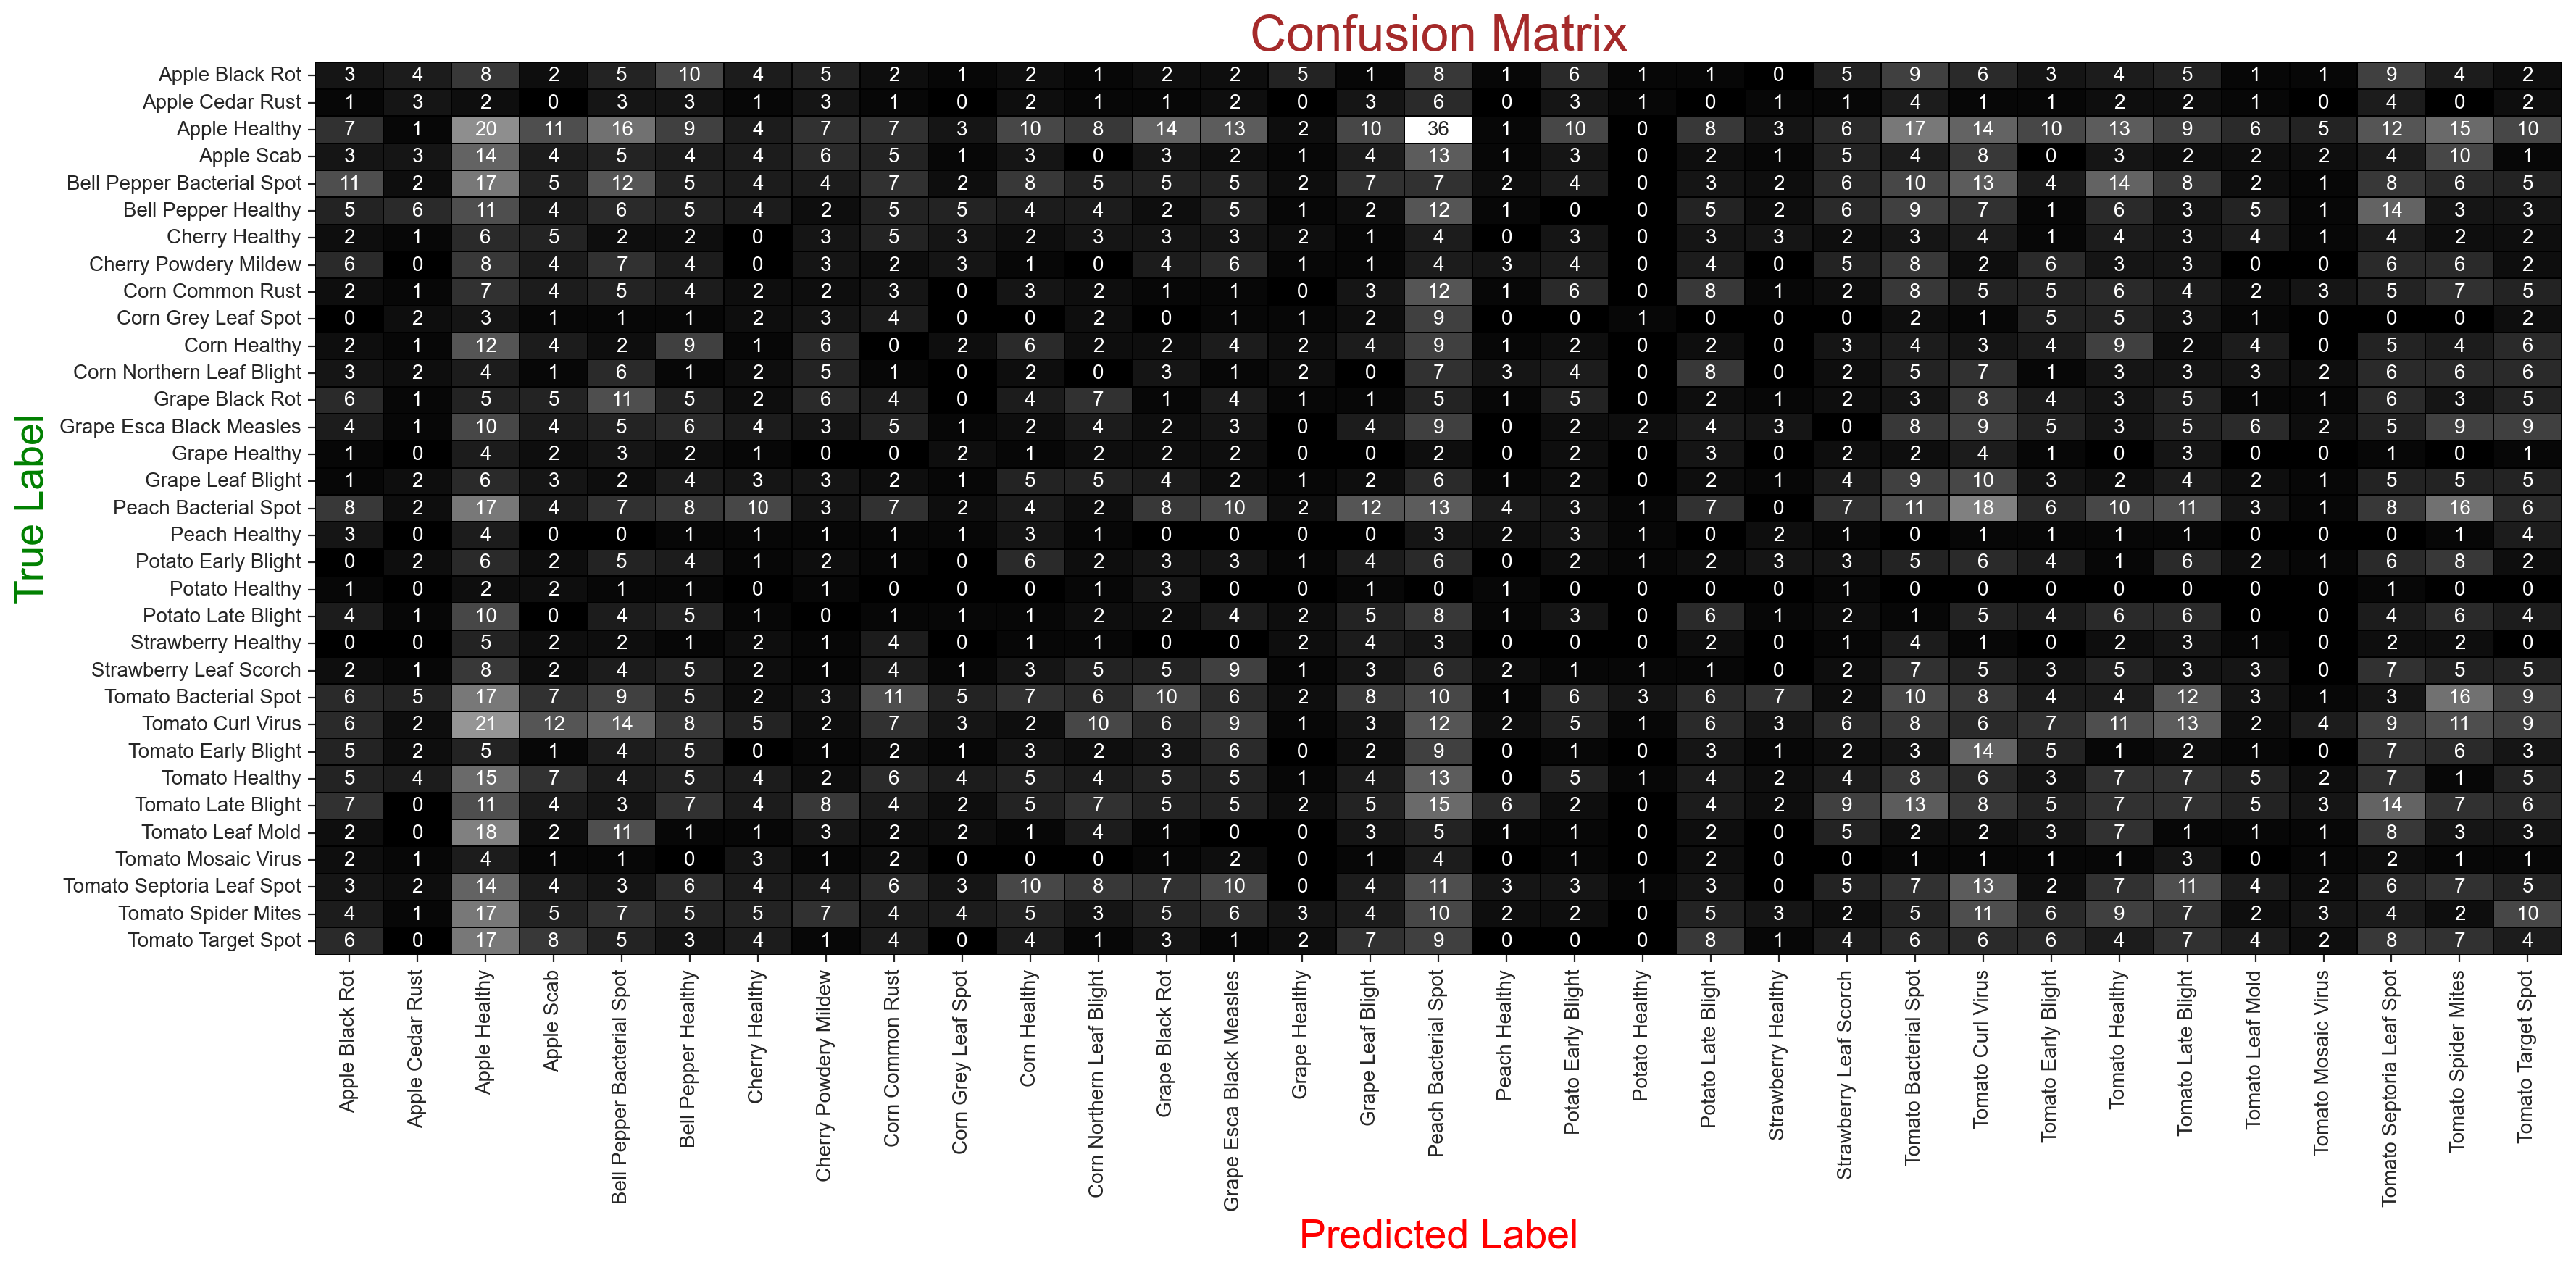

In [25]:
sns.set_style('ticks')

confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (20,8),dpi=200)

sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.1, cmap = "gist_yarg_r",
            linecolor="black", fmt='.0f', ax=ax,
            cbar=False, xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predicted Label",fontdict={'color':'red','size':20})
plt.ylabel("True Label",fontdict={'color':'green','size':20})
plt.title("Confusion Matrix",fontdict={'color':'brown','size':25})

plt.show()

In [19]:
# Get the class indices from the train_generator
class_indices = train_data.class_indices

# Display the class names in a sorted order
print("Class names and their indices:")
for class_name, index in sorted(class_indices.items(), key=lambda x: x[1]):
    print(f"{index}: {class_name}")

Class names and their indices:
0: Apple Black Rot
1: Apple Cedar Rust
2: Apple Healthy
3: Apple Scab
4: Bell Pepper Bacterial Spot
5: Bell Pepper Healthy
6: Cherry Healthy
7: Cherry Powdery Mildew
8: Corn Common Rust
9: Corn Grey Leaf Spot
10: Corn Healthy
11: Corn Northern Leaf Blight
12: Grape Black Rot
13: Grape Esca Black Measles
14: Grape Healthy
15: Grape Leaf Blight
16: Peach Bacterial Spot
17: Peach Healthy
18: Potato Early Blight
19: Potato Healthy
20: Potato Late Blight
21: Strawberry Healthy
22: Strawberry Leaf Scorch
23: Tomato Bacterial Spot
24: Tomato Curl Virus
25: Tomato Early Blight
26: Tomato Healthy
27: Tomato Late Blight
28: Tomato Leaf Mold
29: Tomato Mosaic Virus
30: Tomato Septoria Leaf Spot
31: Tomato Spider Mites
32: Tomato Target Spot


In [ ]:
model.save('./Model.keras')